In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

plt.style.use('seaborn-whitegrid')

## Uploading data

All data is contained in .txt files as an adjency list of a graph. Networkx library allows directly convert in into the nx.Graph object. 

All graphs do not contain private users and deleted accounts on Vk.com.

In [2]:
file = open('Moscow_operett.txt', 'r')
mo_graph = nx.node_link_graph(eval(file.read())) 
file.close()

file = open('Stairway_graph.txt', 'r')
sw_graph = nx.node_link_graph(eval(file.read())) 
file.close()

file = open('Eterius_graph.txt', 'r')
et_graph = nx.node_link_graph(eval(file.read())) 
file.close()

file = open('Bolshoy_theater_graph.txt','r')
bt_graph = nx.node_link_graph(eval(file.read()))
file.close()

file = open('Matveychuk_theater_graph.txt', 'r')
mt_graph = nx.node_link_graph(eval(file.read()))
file.close()

file = open('Nations_theater_graph.txt', 'r')
nt_graph = nx.node_link_graph(eval(file.read()))
file.close()

file = open('Vita_graph.txt', 'r')
vt_graph = nx.node_link_graph(eval(file.read()))
file.close()

## Preliminary analysis

Visualization and analysis itself **was made only for Moscow operetta community** assuming that general characteristic of community graphs are the same. 

From degree distribution visualization *one can see a common hyperbolic distribution*: values 0 and 0 are dominant among other degrees. It's easy to understand because a random member of  vk community rather does not form a cluster of friends, plus there is always bots (non-existing members).  

As Networkx does not have special function for choosing subgraph according to a degree, proper function was made. Visualizing high-degree nodes ($\geq 50$) *we see a connected core structure (the connectivity component)*. The reason for that lies in question who are these people deeply connected with each other and outside nodes. Non-suprisingly, almost all of them are actors, directors and producers. Spectral layout shows that *only two nodes which is not similar with each other, the rest of the nodes are very similar* according to eigenvectors. In this case circular layout is not effective presentation because of a high graph's connectivity. 

General representation of the graph with no zero degree nodes shows *a main cluster of involved people in the center* and *small groups (2-3 person) around it*. Note that *diad or incomplete triad are more popular than triad* (fully-connected graph with 3 nodes).   

Another useful statistics we can get from distributions of:
- **shortest paths**. The distribution of lengths is normal-like with mean 4. 
- **degree and betweenness centralities** replicate the general hyperbolic distribution for community graphs
- **closeness centrality** has many values close to zero but then comes a normal distribution of closeness in large clique (giganticconnectivity component) 
- **eigenvector centrality** is hardly can be described as any well-known distribution because it has more high values than middle and the majority of values are also close to zero just like in other types of centrality.    

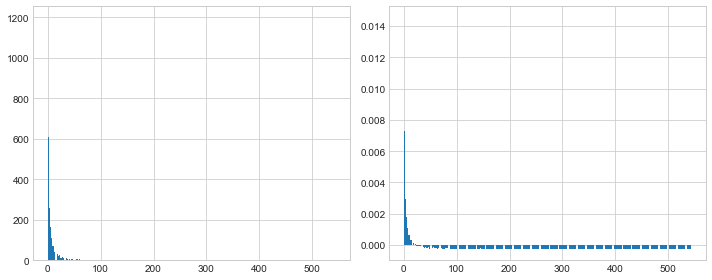

In [3]:
def visualize_degree_dist(graph):
    fig, ax = plt.subplots(1,2)
    fig.set_figheight(4)
    fig.set_figwidth(10)
    degree_dist = np.array(nx.degree_histogram(graph))
    degree_dist_normalized = (degree_dist - degree_dist.mean())/degree_dist.var()


    ax[0].bar([*range(0, len(degree_dist)-1)], degree_dist[1:])
    ax[1].bar([*range(0, len(degree_dist_normalized)-1)], degree_dist_normalized[1:])
    fig.tight_layout()
    plt.show()

visualize_degree_dist(mo_graph)  

In [4]:
def subgraph_with_condition(graph, value, relation = '>='):
    '''
    Returns a subgraph depending on degree. 
    grah: nx.Graph object
    value: int, value of a degree
    relation: str
    '''
    sub_nodes = []
    if relation == '>=':
        for node in nx.nodes(graph):
            if nx.degree(graph, node) >= value:
                sub_nodes.append(node)
    else:
        for node in nx.nodes(graph):
            if nx.degree(graph, node) <= value:
                sub_nodes.append(node)
    return nx.subgraph(graph, sub_nodes)

def visulasize_graph(graph):
    fig, ax = plt.subplots(2,2)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    props = {'with_labels':False, 
            'node_size':10,
            'node_color':'orange'}
    nx.draw(graph, ax = ax[0][0], label = 'deafult layout', **props)
    ax[0][0].set_title('deafult layout', y = -0.05)
    nx.draw_spring(graph, ax = ax[0][1], label = 'sping layout', **props)
    ax[0][1].set_title('sping layout', y = -0.05)
    nx.draw_circular(graph, ax = ax[1][0], label = 'circular layout', **props)
    ax[1][0].set_title('circular layout', y = -0.05)
    nx.draw_spectral(graph, ax = ax[1][1], label = 'spectral layout', **props)
    ax[1][1].set_title('spectral layout', y = -0.05)
    fig.suptitle('Fig 1. Moscow operetta graph visulization of nodes with degree higher than 50', fontsize = 16)

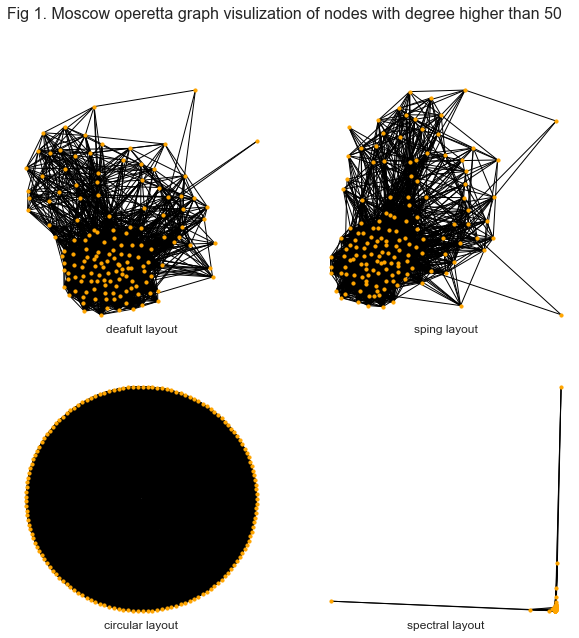

In [5]:
subgraph = subgraph_with_condition(mo_graph, 50)
visulasize_graph(subgraph)

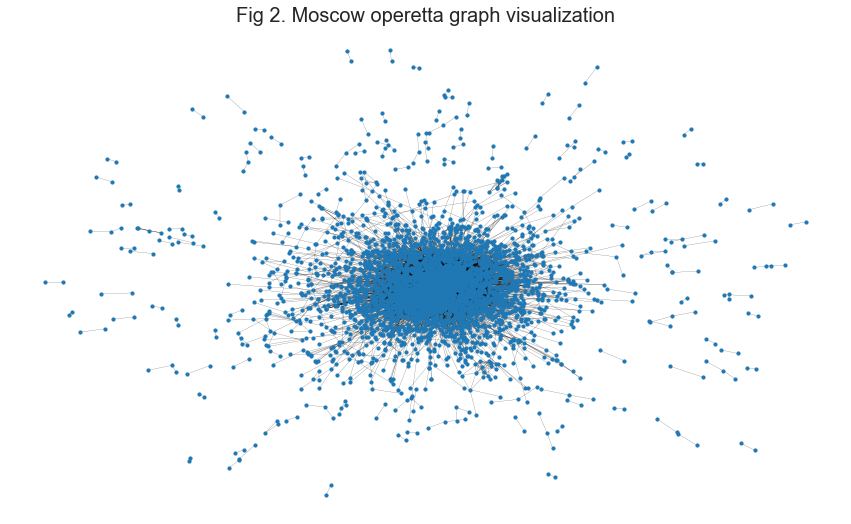

In [6]:
graph = subgraph_with_condition(mo_graph, 1, '>=')
pos = nx.spring_layout(graph, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(graph, pos=pos, ax=ax, **plot_options)
plt.title('Fig 2. Moscow operetta graph visualization', fontsize=20)
plt.show()

In [7]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(graph))

In [8]:
from collections import defaultdict

paths_dist = defaultdict(lambda: 0)

for node in shortest_path_lengths.values():
    for k in node.values():
        paths_dist[k] += 1

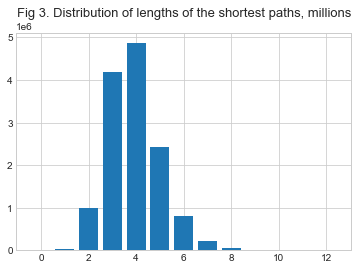

In [9]:
x = np.arange(max(paths_dist.keys())+1)
plt.bar(x = x, height = paths_dist.values())
plt.title('Fig 3. Distribution of lengths of the shortest paths, millions', fontsize = 13, y = 1.05)
plt.show()

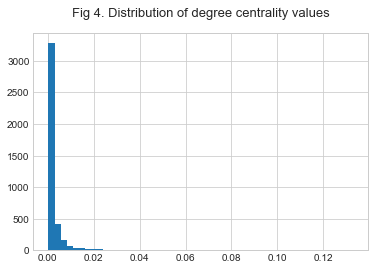

In [10]:
degree_centrality = nx.centrality.degree_centrality(graph)
plt.hist(degree_centrality.values(), bins = 50)
plt.title('Fig 4. Distribution of degree centrality values', fontsize = 13, y = 1.05)
plt.show()

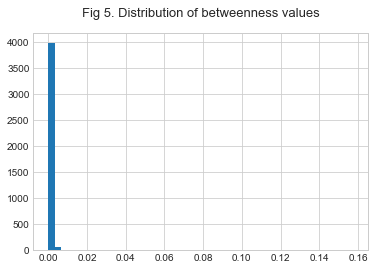

In [11]:
betweenness_centrality = nx.centrality.betweenness_centrality(graph)
plt.hist(betweenness_centrality.values(), bins = 50)
plt.title('Fig 5. Distribution of betweenness values', fontsize = 13, y = 1.05)
plt.show()

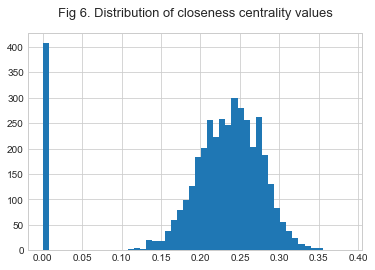

In [12]:
closeness_centrality = nx.centrality.closeness_centrality(graph)
plt.hist(closeness_centrality.values(), bins = 50)
plt.title('Fig 6. Distribution of closeness centrality values', fontsize = 13, y = 1.05)
plt.show()
# видно, что есть много вершин, с небольшой степенью, которые отделены от основного кластера, который сконцертрировался посередине

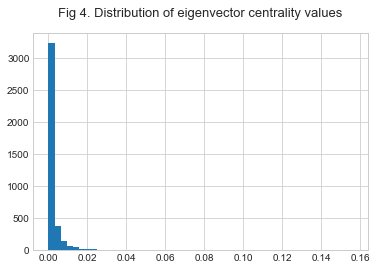

In [13]:
eigenvector_centrality = nx.centrality.eigenvector_centrality(graph)
plt.hist(eigenvector_centrality.values(), bins = 50)
plt.title('Fig 7. Distribution of eigenvector centrality values', fontsize = 13, y = 1.05)
plt.show()

## Comparative analysis

The focal point of interest is to analyse differences between classical theaters (Bolshoy, Nations theater) and non-classical ones. Note that Moscow operetta graph is considered to be non-classical - it is just a convention. Motivation to this classification comes from the repertoire of this theater which contains popular musicals (Anna Karenina, Monte Cristo...). 

Firstly, let's create a correlation matrix. There are only 2 significant relations: **negative (-0.78) between average clustering and mean degree (10% sugnificant level) and strong positive (0.93) between average clustering and density**. The second one is not surprising - more edges between nodes more chances for two random nodes to be connected. However, the the first relationship is explained by specifics of the graph.

Mean degree can raise with increase of low-degree nodes (2-4) from zero nodes or with increasing high-degree nodes in the main gigantic cluster. The first hypothesis is rejected because a growth of such nodes also increase clustering. Thefore, it reveals a general principle: **in theater graphs higher mean degree is caused by centricity of main cluster like in fig. 10**. Red nodes  high degree form the main cluster of blue nodes which are not interconnected. Moreover, *high mean degree corresponds to classic repertoire (fig.8)* and **their gigantic connectivity component is organized as fig. 10**.

Also, **average cluster coefficient is higher in non-classic theater on 245%**, hence, the audience of these theaters is more connected and forms small communities.  

In [14]:
def get_analytics(*args):
    graphs = list(args)
    properties = {}
    
    for graph in graphs:
        degree_dist = np.array(nx.degree_histogram(graph))
        properties[graph] = {'max_degree': degree_dist.max(),
                            'min_degree': degree_dist.min(),
                            'mean_degree': degree_dist.mean(),
                            'density': nx.density(graph),
                            'number_of_nodes': nx.number_of_nodes(graph),
                            'av_clustering': nx.average_clustering(graph),
                            }
    
    return properties

In [15]:
properties = get_analytics(mo_graph, 
                           et_graph, 
                           sw_graph,
                           bt_graph, 
                           mt_graph,
                           nt_graph,
                           vt_graph)
list_of_graphs = ['Moscow operetta', 
                 'Stairway graph', 
                 'Eterius',
                 'Bolshoy theater', 
                 'Matveychuk theater',
                 'Nations theater',
                 'Vita']

In [16]:
import pandas as pd

mean_degree = np.array([])
number_of_nodes = np.array([])
density = np.array([])
av_clustering = np.array([])
for i in properties:
    mean_degree = np.append(mean_degree, properties[i]['mean_degree'])
    number_of_nodes = np.append(number_of_nodes, properties[i]['number_of_nodes'])
    density = np.append(density, properties[i]['density'])
    av_clustering = np.append(av_clustering, properties[i]['av_clustering'] * 100)
    
df = pd.DataFrame(np.concatenate([mean_degree[:, np.newaxis], 
                    number_of_nodes[:, np.newaxis], 
                    density[:, np.newaxis], 
                    av_clustering[:, np.newaxis]], 
                    axis = 1), columns = ['mean_degree', 'number_of_nodes', 'density', 'av_clustering'])
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,mean_degree,number_of_nodes,density,av_clustering
mean_degree,1.000000,0.692663,-0.513251,-0.780865
number_of_nodes,0.692663,1.000000,-0.575367,-0.648819
density,-0.513251,-0.575367,1.000000,0.926484
av_clustering,-0.780865,-0.648819,0.926484,1.000000


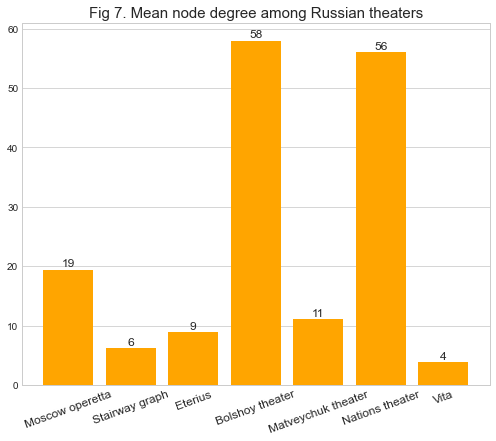

In [17]:
fig = plt.figure(figsize=(7,6))
x = range(7)
plt.bar(x, mean_degree, color = 'orange')
for i in x:
    plt.text(i, mean_degree[i]+0.5, int(round(mean_degree[i],0)), ha = 'center', fontsize = 12)
plt.xticks(x, list_of_graphs, rotation = 20, fontsize=12)
plt.grid(axis='x', color='0.95')
fig.tight_layout()
plt.title('Fig 8. Mean node degree among Russian theaters', fontsize=15)
plt.show()

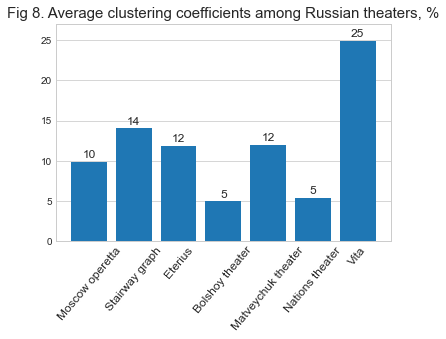

In [18]:
x = range(7)
plt.bar(x, av_clustering)
for i in x:
    plt.text(i, av_clustering[i]+0.5, int(round(av_clustering[i],0)), ha = 'center', fontsize = 12)
plt.xticks(x, list_of_graphs, rotation = 50, fontsize=12)
plt.grid(axis='x', color='0.95')
fig.tight_layout()
plt.title('Fig 9. Average clustering coefficients among Russian theaters, %', fontsize=15)
ax = plt.gca()
ax.set_ylim([0, 27])
plt.show()

In [19]:
# By how many percent mean clustering coefficient of non-classical theaters is higher   
(av_clustering.sum() - av_clustering[3] + av_clustering[6]) / (av_clustering[3] + av_clustering[6]) * 100

344.95593999157256

Text(0.5, 1.0, 'Figure 9. Example of forming a main cluster')

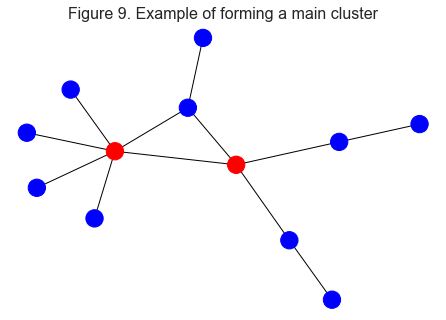

In [20]:
d = {1: [12,11,10,9,8,2], 
     2: [8,6,3], 
     3: [2,4], 
     4: [3], 
     5: [6], 
     6: [2], 
     7: [8],
     8: [7,2], 
     9: [1],
     10:[1],
     11:[1],
     12:[1]}
nx.draw(nx.Graph(d), with_labels = False, node_color = ['red', 'red'] + ['blue'] * 10)
plt.title('Figure 10. Example of forming a main cluster', fontsize = 16)

## Demonstration of the algorithm choosing optimal agents

In our paper ["Measuring the word of mouth effect"](https://drive.google.com/file/d/1YaSA6icNOFg1eCNCAvKpTYQ0iY5fPbBK/view?usp=sharing) we proposed the heuristic algorithm to solve a problem of choosing best agents to spred news or rumors in community networks. A complete solution with estimation of expected value is NP-hard problem, thus, different approaches are required.

Firsly, we want to choose nodes *from different sizable clusters*. They *should be less connected with each other* and nonetheless *influential in their cliques*. Eigenvector with highest eigenvalue gives most influential agents, however they likely to be interconnected because an impact of one rises an impact of connected nodes. Other method to measure influence is closeness centrality which is the average length of the shortest paths to all connected nodes. The idea of choosing agents from various cliques can be implemented with degree centrality: nodes with the highest degrees most probably will be more efficient in spreading the information. 

**How does the algorithm work?**
1. On the first step 3 measures of centrality are computed with parallel computing. Above argumentation points out eigenvector, closeness and degree centrality.
2. Second step consists of third-step sorting in the following order:
    - degree centrality
    - closeness centrality
    - eigenvector centrality

Such sorting chooses nodes with highest degrees, among them with the highest closeness centrality and only then most influential nodes according to an eigenvector. 

**Implementation**

To exclude nodes-outliers which are actors, producers... in our case - people who do not need any rumor information, and make computations easier one should form borders to node degree. Minimal left board is obviously 1 because nodes with degree 0 will appear in choosing agents only in special case: when all nodes have zero degree. 

Right border can be define may ways. In this work naive approach is used: let's contract node degree with mean degree plus a half of standard deviation. In general, a proper border should be found empirically according to the nature of data.       

In [21]:
def get_best_agents(graph, n_agents):
    '''
    Takes two argumets:
    graph: networkx.Graph object
    n_agents: int, how many agents are required to choose
    Returns a list of best agents
    '''
    degree_centrality = nx.centrality.degree_centrality(graph)
    closeness_centrality = nx.centrality.closeness_centrality(graph)
    eigenvector_centrality = nx.centrality.eigenvector_centrality(graph)
    heuristic_centrality = {i: [degree_centrality[i], 
                                closeness_centrality[i], 
                                eigenvector_centrality[i]] for i in degree_centrality.keys()}
    
    return list(
        map(int, 
               list(
        dict(
            sorted(heuristic_centrality.items(), key = lambda x: (x[1][0],x[1][1],x[1][2]), reverse = True
                  )
        ).keys()
               )[:n_agents]
              )
    )

In [22]:
graph = subgraph_with_condition(mo_graph, 1)
degree_dist = np.array(nx.degree_histogram(graph))
degree_dist.mean(), degree_dist.std()

(7.513761467889908, 62.381544947777165)

In [23]:
graph = subgraph_with_condition(graph, 39, '<=')
best_agents = get_best_agents(graph, 20)

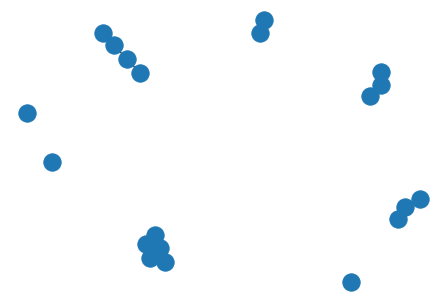

In [24]:
nx.draw(nx.subgraph(graph, best_agents)) # note they are almost are not interconnected